# **Problem Definition**

> Retail businesses, such as shopping malls, attract a diverse group of customers with different purchasing behaviors, income levels, and spending patterns. Without proper segmentation,

it becomes difficult for management to:

Identify which **groups of customers** contribute the most revenue.

Design targeted marketing campaigns.

Offer personalized promotions and loyalty programs.

Improve customer satisfaction and retention.

The problem is that the mall currently treats all customers as a single group, which leads to inefficient marketing efforts and missed opportunities for revenue growth.

**Objective:**
To use unsupervised machine learning (clustering) to segment customers into meaningful groups based on attributes such as Annual Income and Spending Score. These segments will help mall management:

Understand customer profiles (e.g., high-income high-spending, low-income low-spending, etc.).

Tailor marketing strategies to specific customer groups.

Improve overall business decision-making with data-driven insights.

# **Data Exploration And Preperation**

## **Import Libraries**

In [1]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

## **Data Loading**

In [3]:
path = '/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'
data = pd.read_csv(path)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **Exploratory Data Analysis**

In [4]:
print("Shape: ", data.shape, '\n\n')
print("Columns: ", data.columns, '\n\n')

Shape:  (200, 5) 


Columns:  Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object') 




In [5]:
print("---- Data Information ----\n\n", data.info, '\n\n\n')
print("---- Data Describtion ----\n\n", data.describe, '\n\n\n')
print("---- Columns Datatype ----\n\n", data.dtypes, '\n\n\n')
print("---- Descriptive columns Describtion ----\n\n", data.describe(include='object'))

---- Data Information ----

 <bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]> 



---- Data Describtion ----

 <boun

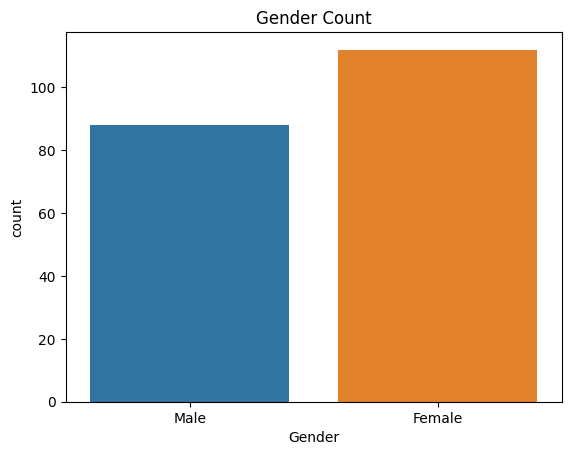

In [6]:
sns.countplot(x='Gender', data=data)
plt.title("Gender Count")
plt.show()

In [7]:
print("Missing values number in each column:\n\n",data.isnull().sum(), "\n\n\n\n")
print("Unique values in each column:\n\n", data.nunique())

Missing values number in each column:

 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64 




Unique values in each column:

 CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


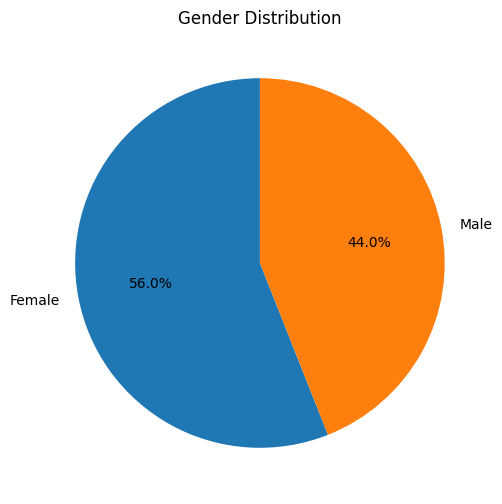

In [8]:
plt.figure(figsize=(6,6))
data['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

In [9]:
corr = data.corr(numeric_only=True)
print(corr)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


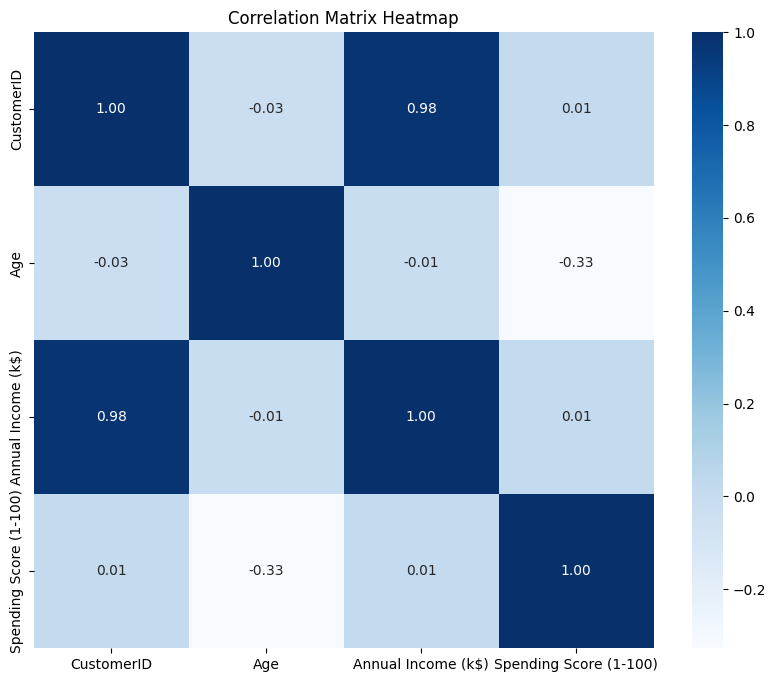

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


Except for the artificial CustomerID–Income correlation, **there is no strong correlation** among the real features.


CustomerID vs Annual Income = 0.97 → almost perfect correlation.
But this is artificial, because **CustomerID is just an index, not a real feature**.

Age vs Spending Score = -0.33 → a weak/moderate negative correlation (older customers tend to have lower spending scores).

Annual Income vs Spending Score = 0.0099 → basically no correlation.

Other correlations are near 0, meaning no relationship.

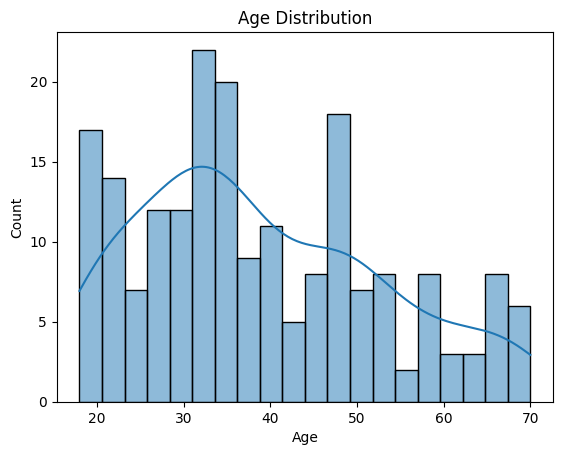

In [11]:
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

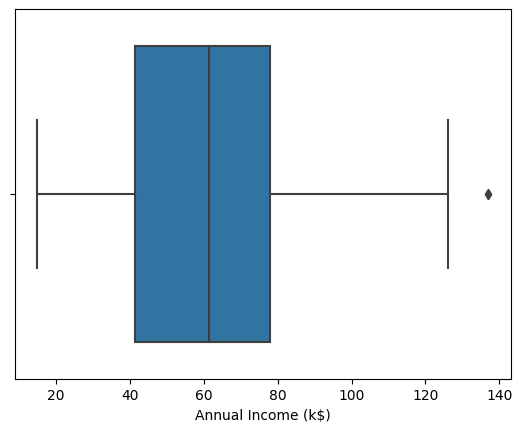

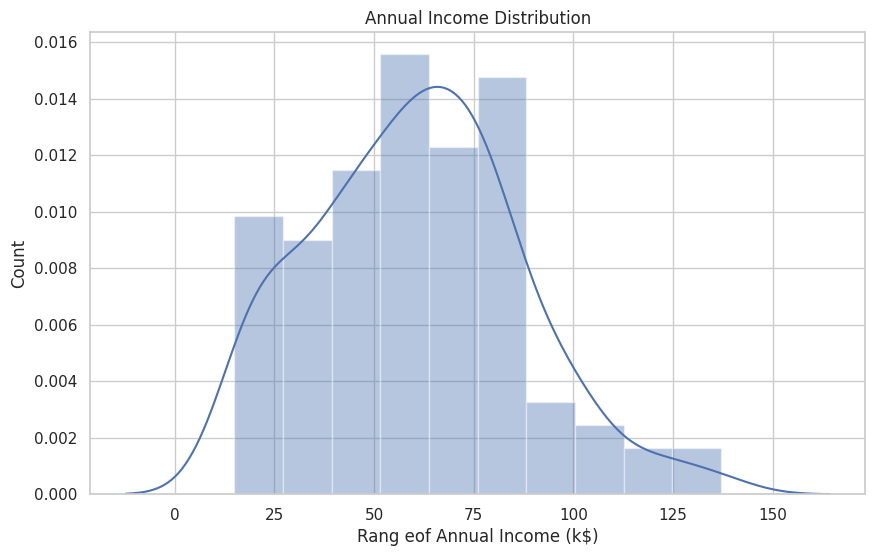

In [12]:
sns.boxplot(x=data['Annual Income (k$)'])
plt.show()

plt.figure(figsize=(10,6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Annual Income Distribution')
plt.xlabel('Rang eof Annual Income (k$)')
plt.ylabel('Count')
plt.show()

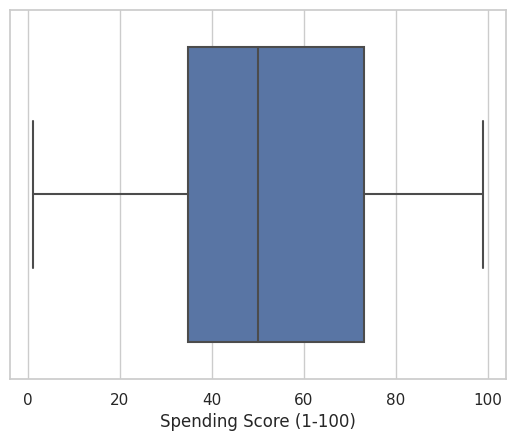

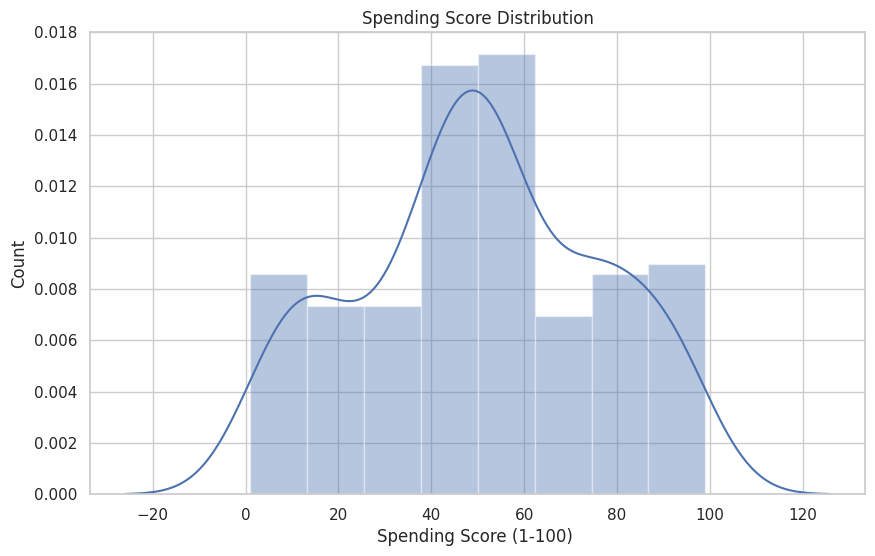

In [13]:
sns.boxplot(x=data['Spending Score (1-100)'])
plt.show()


plt.figure(figsize=(10,6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100) ')
plt.ylabel('Count')
plt.show()

### **Bivariate Analysis**

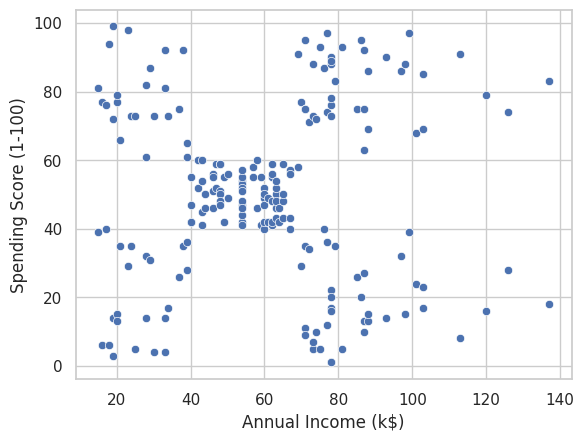

In [14]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.show()

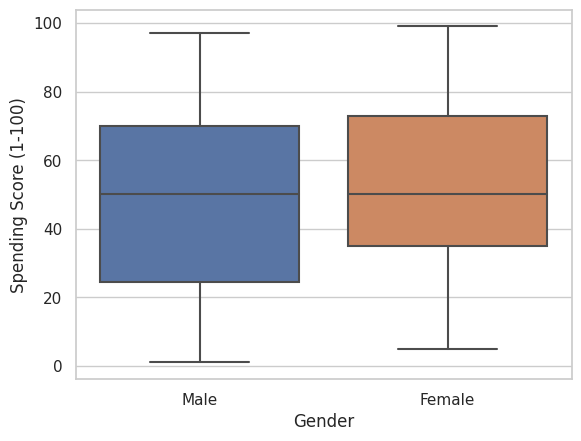

In [15]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.show()

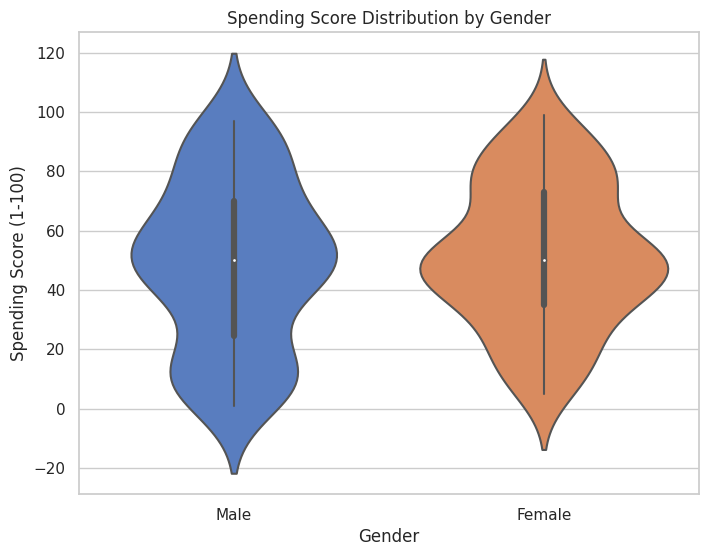

In [16]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Gender", y="Spending Score (1-100)", data=data, palette="muted")
plt.title("Spending Score Distribution by Gender")
plt.show()


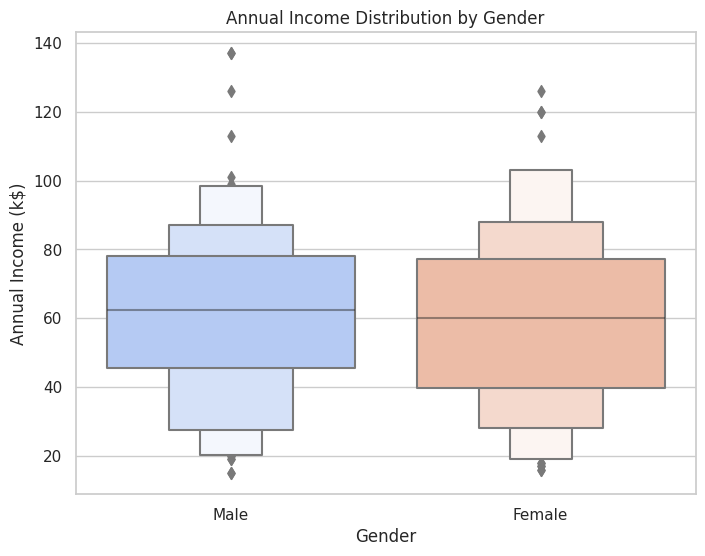

In [17]:
plt.figure(figsize=(8,6))
sns.boxenplot(x="Gender", y="Annual Income (k$)", data=data, palette="coolwarm")
plt.title("Annual Income Distribution by Gender")
plt.show()

### **Multivariate Analysis**

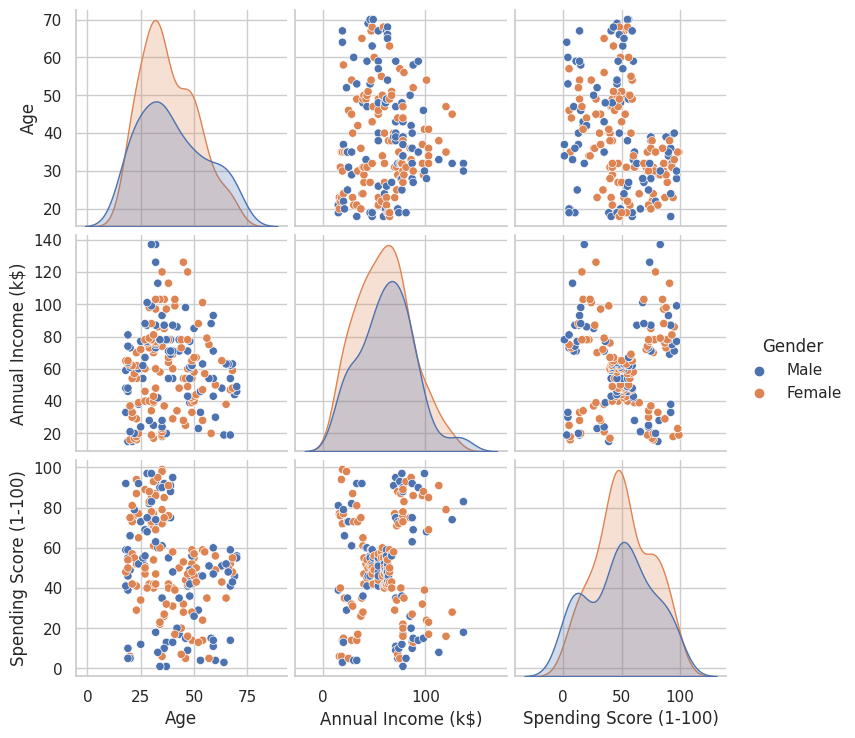

In [18]:
sns.pairplot(
    data, 
    vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 
    hue="Gender"
)
plt.show()


## **Data Preprocessing**

In [19]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Model Training (Clustering) - kMeans - 2D**

## **Finding Optimal Number of Clusters**

In [21]:
wcss = [] #Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

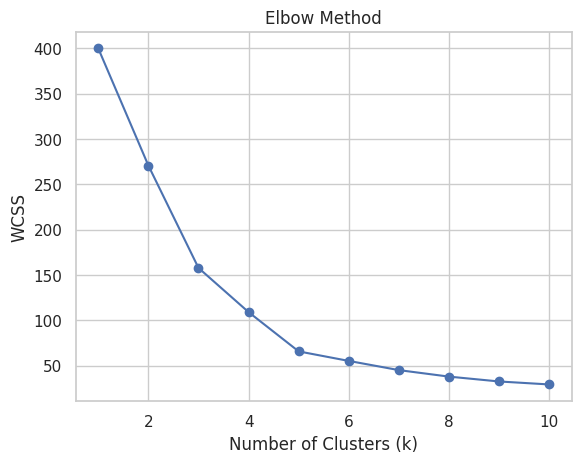

In [22]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [24]:
data['Label'] = clusters
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


## **Cluster Visualization**

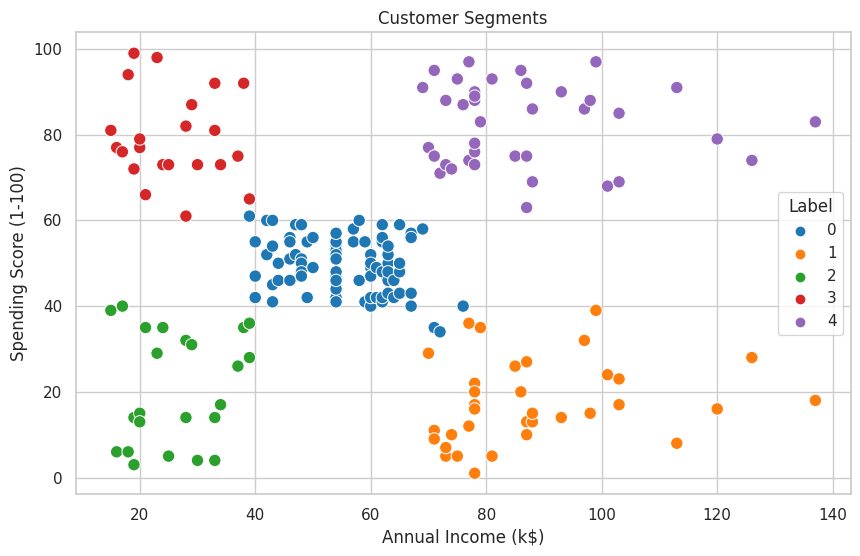

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Label',
    palette='tab10',
    data=data,
    s=80
)
plt.title("Customer Segments")
plt.show()

## **Cluster Profiling**

In [26]:
cluster_profile = data.groupby('Label')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profile)

             Age  Annual Income (k$)  Spending Score (1-100)
Label                                                       
0      42.716049           55.296296               49.518519
1      41.114286           88.200000               17.114286
2      45.217391           26.304348               20.913043
3      25.272727           25.727273               79.363636
4      32.692308           86.538462               82.128205


**Customer Segments**

Cluster **0** – **Average Customers**: Average income and spending.

Cluster **1** – High-Income Low-Spenders: Rich but spend little, **potential for upsell**.

Cluster **2** – **Budget Customers**: Low income and low spending.

Cluster **3** – Young **Value-Seekers**: Low income, high spending.

Cluster **4** – VIP / **Premium**: High income and high spending, most valuable.

In [27]:
cluster_names = {
    0: "Average Customers",
    1: "High-Income Low-Spenders",
    2: "Budget Customers",
    3: "Young Value-Seekers",
    4: "VIP / Premium"
}

In [28]:
counts_named = data['Label'].map(cluster_names).value_counts()
print(counts_named)

Label
Average Customers           81
VIP / Premium               39
High-Income Low-Spenders    35
Budget Customers            23
Young Value-Seekers         22
Name: count, dtype: int64


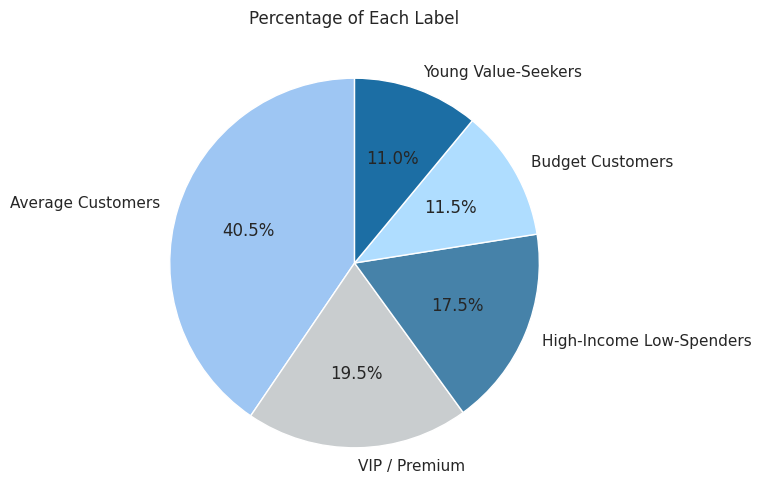

In [29]:
colors = ['#9EC6F3','#C9CDCF', '#4682A9', '#AFDDFF', '#1C6EA4'] 
plt.figure(figsize=(6,6))
plt.pie(
    counts_named, 
    labels=counts_named.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors
)
plt.title("Percentage of Each Label")
plt.show()

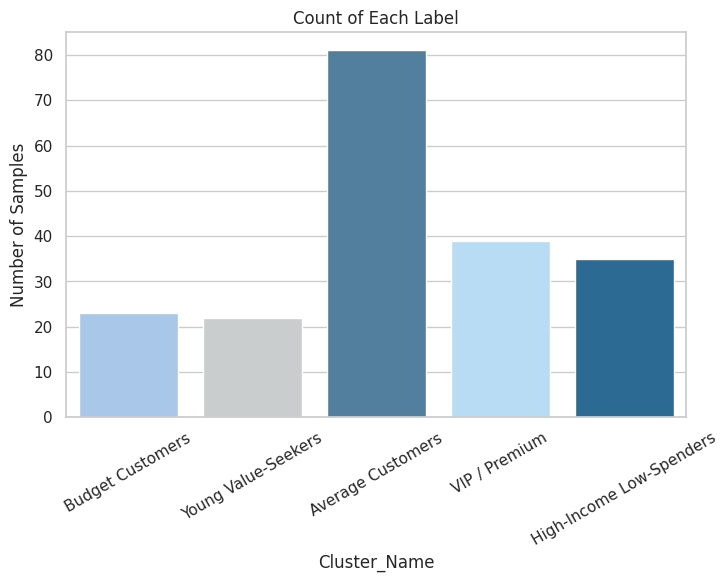

In [30]:
data['Cluster_Name'] = data['Label'].map(cluster_names)


plt.figure(figsize=(8,5))
sns.countplot(x='Cluster_Name', data=data, palette=colors)
plt.title("Count of Each Label")
plt.ylabel("Number of Samples")
plt.xticks(rotation=30) 
plt.show()


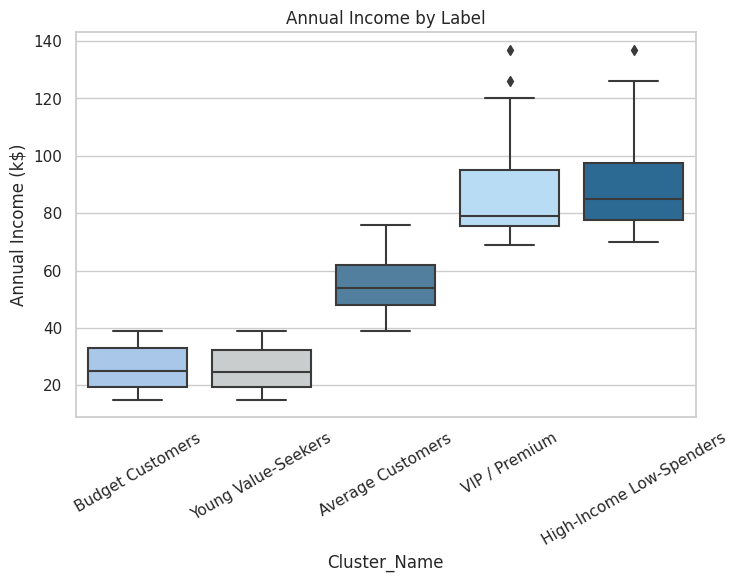

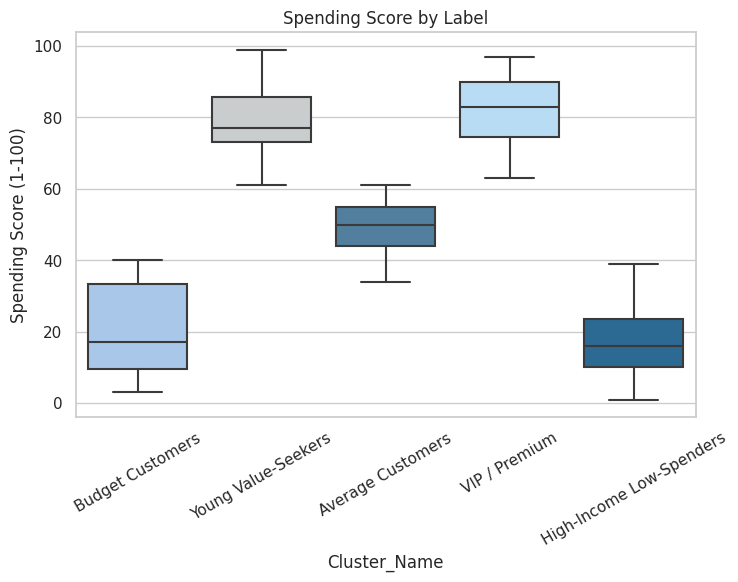

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster_Name', y='Annual Income (k$)', data=data, palette=colors)
plt.title("Annual Income by Label")
plt.xticks(rotation=30) 
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster_Name', y='Spending Score (1-100)', data=data, palette=colors)
plt.title("Spending Score by Label")
plt.xticks(rotation=30) 
plt.show()

## **Conclusion & Business Insights**

# **Model Training (Clustering) - kMeans - MD(3D)**

In [32]:
data_3d = data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
data_3d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
X_3d = data_3d[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
X_3d.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [34]:
wcss_3d = []
for i in range(1,11):
    km_3d = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    km_3d.fit(X_3d)
    wcss_3d.append(km_3d.inertia_)

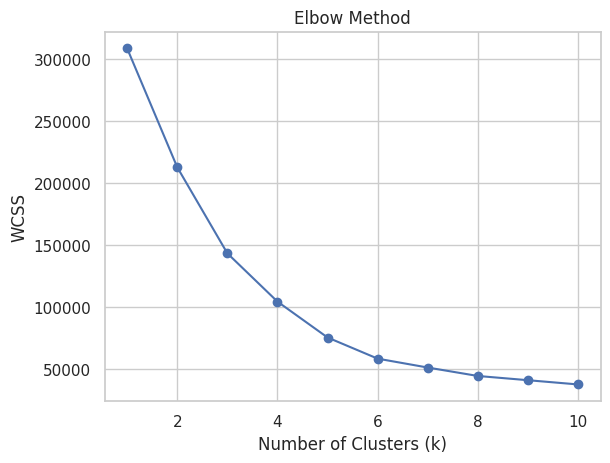

In [35]:
plt.plot(range(1, 11), wcss_3d, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [36]:
km_3d = KMeans(5)
km_3d.fit(X_3d)
y_3d = km_3d.predict(X_3d)
data_3d['Label'] = y_3d

data_3d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


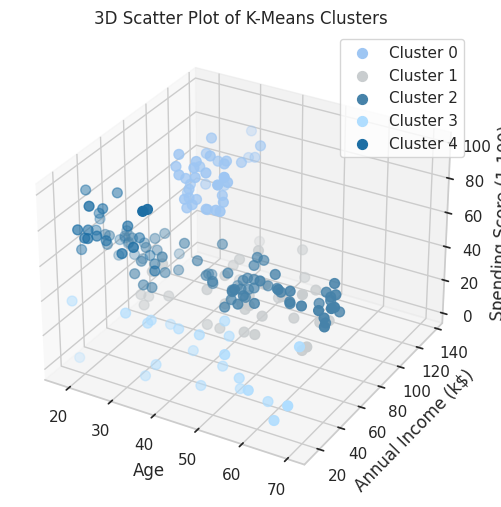

In [37]:
# 3D figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
for cluster in range(5):  # number of clusters
    ax.scatter(
        data_3d.loc[data_3d['Label']==cluster, X_3d.columns[0]],
        data_3d.loc[data_3d['Label']==cluster, X_3d.columns[1]],
        data_3d.loc[data_3d['Label']==cluster, X_3d.columns[2]],
        s=50,
        color=colors[cluster],
        label=f'Cluster {cluster}'
    )

# Labels
ax.set_xlabel(X_3d.columns[0])
ax.set_ylabel(X_3d.columns[1])
ax.set_zlabel(X_3d.columns[2])
ax.set_title('3D Scatter Plot of K-Means Clusters')
ax.legend()
plt.show()


In [38]:
cluster_profile = data_3d.groupby('Label')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profile)

             Age  Annual Income (k$)  Spending Score (1-100)
Label                                                       
0      32.692308           86.538462               82.128205
1      40.666667           87.750000               17.583333
2      43.088608           55.291139               49.569620
3      45.217391           26.304348               20.913043
4      25.521739           26.304348               78.565217


In [39]:
counts_named = data_3d['Label'].map(cluster_names).value_counts()
print(counts_named)

Label
Budget Customers            79
Average Customers           39
High-Income Low-Spenders    36
Young Value-Seekers         23
VIP / Premium               23
Name: count, dtype: int64


# **DBSCAN**

Density-Based Spatial Clustering of Applications with Noise

In [40]:
data_dbscan = data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
data_dbscan.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
X_dbscan = data_dbscan[['Annual Income (k$)', 'Spending Score (1-100)']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dbscan)

In [42]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to adjust eps and min_samples
labels = dbscan.fit_predict(X_scaled)

# Add the cluster labels to your dataset
data_dbscan['DBSCAN_Label'] = labels

In [43]:
data_dbscan.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),DBSCAN_Label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


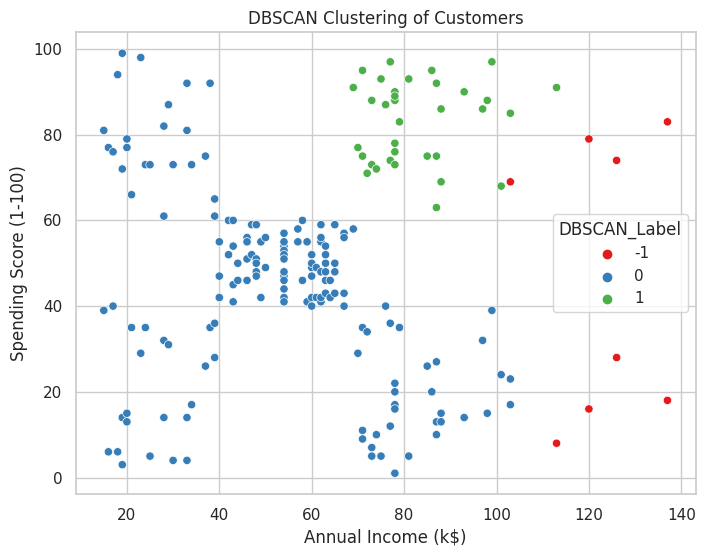

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='DBSCAN_Label', palette='Set1', data=data_dbscan)
plt.title('DBSCAN Clustering of Customers')
plt.show()

In [45]:
# Exclude noise points (-1)
cluster_data = data_dbscan[data_dbscan['DBSCAN_Label'] != -1]

# Group by cluster and calculate mean
average_spending = cluster_data.groupby('DBSCAN_Label')['Spending Score (1-100)'].mean()
average_income = cluster_data.groupby('DBSCAN_Label')['Annual Income (k$)'].mean()

print("Average Spending per Cluster:")
print(average_spending)
print("\nAverage Income per Cluster:")
print(average_income)


Average Spending per Cluster:
DBSCAN_Label
0    43.101911
1    82.800000
Name: Spending Score (1-100), dtype: float64

Average Income per Cluster:
DBSCAN_Label
0    52.490446
1    82.542857
Name: Annual Income (k$), dtype: float64


In [46]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label,Cluster_Name
0,1,Male,19,15,39,2,Budget Customers
1,2,Male,21,15,81,3,Young Value-Seekers
2,3,Female,20,16,6,2,Budget Customers
3,4,Female,23,16,77,3,Young Value-Seekers
4,5,Female,31,17,40,2,Budget Customers


In [47]:
avg_spending = data.groupby('Label')['Spending Score (1-100)'].mean()
avg_income = data.groupby('Label')['Annual Income (k$)'].mean()

print("Average Spending per Cluster:")
print(avg_spending)

print("\nAverage Income per Cluster:")
print(avg_income)

Average Spending per Cluster:
Label
0    49.518519
1    17.114286
2    20.913043
3    79.363636
4    82.128205
Name: Spending Score (1-100), dtype: float64

Average Income per Cluster:
Label
0    55.296296
1    88.200000
2    26.304348
3    25.727273
4    86.538462
Name: Annual Income (k$), dtype: float64
